# Relational Database Management System (RDBMS) and Python

The dataset that we are going to use is from `European Soccer Database`. First we download the database file (SQLite format) from the Kaggle link below and put it in the same directory as our Python script/Jupyter Notebook.

url = https://www.kaggle.com/hugomathien/soccer

### SQLite3

The data is in SQL database so we need to retrive using query language. We to connect SQL database with python. 

- We use **SQLite3** for this purpose. SQLite3 is a serverless, open-source, and self-contained relational database management system (RDBMS) that is widely used for embedded systems and small to medium-sized applications.

- SQLite3 can be integrated with Python using **`sqlite3 module`**, which was written by Gerhard Haring.

### Libraries

In [337]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error 

# 1- Read Data from SQLite Database into Pandas

### (i) Import the sqlite3 module:

In [338]:
import sqlite3 # to integrate SQLite3 with Python

### (ii) Connect to the SQLite database:

You need to establish a connection to the SQLite database using the sqlite3.connect() function. If the database file does not exist, it will be created. If it exists, the function will establish a connection to it.

For example, consider a database with the name `database`:

In [339]:
# Replace 'database.sqlite' with the actual path to your SQLite database file

connection = sqlite3.connect('database.sqlite') # Create your connection.

### (iii) Execute an SQL query and Store in Pandas DataFrame

Now, you can execute SQL queries using the connection.
    
For example, to retrieve all rows from a `table` named **Player_Attributes**:

In [340]:
data = pd.read_sql_query("SELECT * FROM Player_Attributes", connection)
data.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team
formations, with player names and a pair of coordinates to indicate their position on the pitch.

- +25,000 matches
- +10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including
- the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for
- +10,000 matches

# 2- Predicting Players Rating

We want to use Decision Tree Regressor to predict **overall_rating** of the players.

### Data Overview

In [341]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the data set')

There are 183978 rows and 42 columns in the data set


In [342]:
data.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [343]:
print(f'There are {data.isnull().sum().sum()} missing values in the data set')

There are 47301 missing values in the data set


In [344]:
print(f'There is {data.duplicated().sum()} duplicate in the data set')

There is 0 duplicate in the data set


In [345]:
data.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [346]:
numeric_col = data.loc[:, (data.dtypes=='int64') | (data.dtypes=='float64')].columns
object_col = data.loc[:, data.dtypes=='object'].columns
object_col

Index(['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [347]:
print('There are {} object variables and {} numerical variabes in the data set '.format(len(object_col), len(numeric_col)))

There are 4 object variables and 38 numerical variabes in the data set 


### Unique Values in Object Variables

In [348]:
data[object_col].head()

,date,preferred_foot,attacking_work_rate,defensive_work_rate
0,2016-02-18 00:00:00,right,medium,medium
1,2015-11-19 00:00:00,right,medium,medium
2,2015-09-21 00:00:00,right,medium,medium
3,2015-03-20 00:00:00,right,medium,medium
4,2007-02-22 00:00:00,right,medium,medium


In [349]:
print('\nUnique labels in object variables:\n')

data['preferred_foot'].unique()

for val in object_col:
    print(f' <{val}> : {len(data[val].unique())}')


Unique labels in object variables:

 <date> : 197
 <preferred_foot> : 3
 <attacking_work_rate> : 9
 <defensive_work_rate> : 20


In [350]:
data['attacking_work_rate'].value_counts(dropna=False)

medium    125070
high       42823
low         8569
None        3639
None        3230
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [351]:
data['defensive_work_rate'].value_counts(dropna=False)

medium    130846
high       27041
low        18432
_0          2394
o           1550
None         836
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

### Data Manipulation

Variable `date` mistakenly stored as object and we need to change it to datetime

In [352]:
data['date'] = pd.to_datetime(data['date'])

In variable `attacking_work_rate` and `defensive_work_rate` there are some mistakenly input data (labels). We make a new label category for these data.. We also consider data labeled as `norm` to belong tho the `medium` label.

In [353]:
data['attacking_work_rate'] = data['attacking_work_rate'].replace({'norm': 'medium',
                                                                   'None': 'new-label', 
                                                                   'y':    'new-label',
                                                                   'le':   'new-label',
                                                                   'stoc': 'new-label'})

In [354]:
data['defensive_work_rate'] = data['defensive_work_rate'].replace({'ormal': 'medium',
                                                                   '_0':    'low',
                                                                    'o':    'low',
                                                                    '0':    'low',
                                                                    '1':    'low',
                                                                    '2':    'low',
                                                                    '3':    'low',
                                                                    '4':    'medium',
                                                                    '5':    'medium',
                                                                    '6':    'medium',
                                                                    '7':    'high',
                                                                    '8':    'high',
                                                                    '9':    'high',
                                                                   'es':    'new-label',
                                                                   'ean':   'new-label',
                                                                   'tocky': 'new-label'})

In [355]:
numeric_col = data.loc[:, (data.dtypes=='int64') | (data.dtypes=='float64')].columns
object_col = data.loc[:, data.dtypes=='object'].columns
object_col

Index(['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [356]:
print('\nUnique labels in modified object variables:\n')

data['preferred_foot'].unique()

for val in object_col:
    print(f' <{val}> : {len(data[val].unique())}')


Unique labels in modified object variables:

 <preferred_foot> : 3
 <attacking_work_rate> : 5
 <defensive_work_rate> : 5


### Target variable is **overall_rating**.

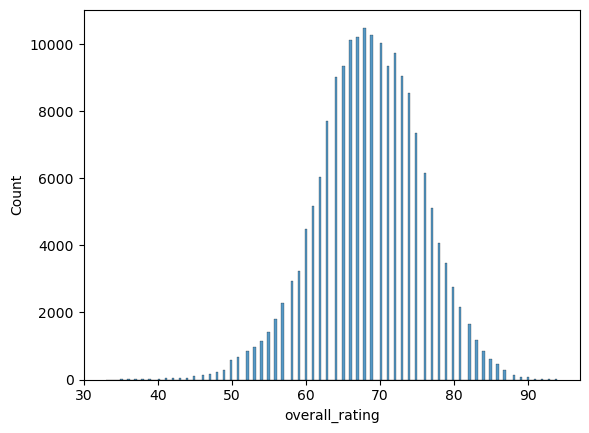

In [357]:
sns.histplot(data, x='overall_rating');

### Target variable and Chategorical Variables

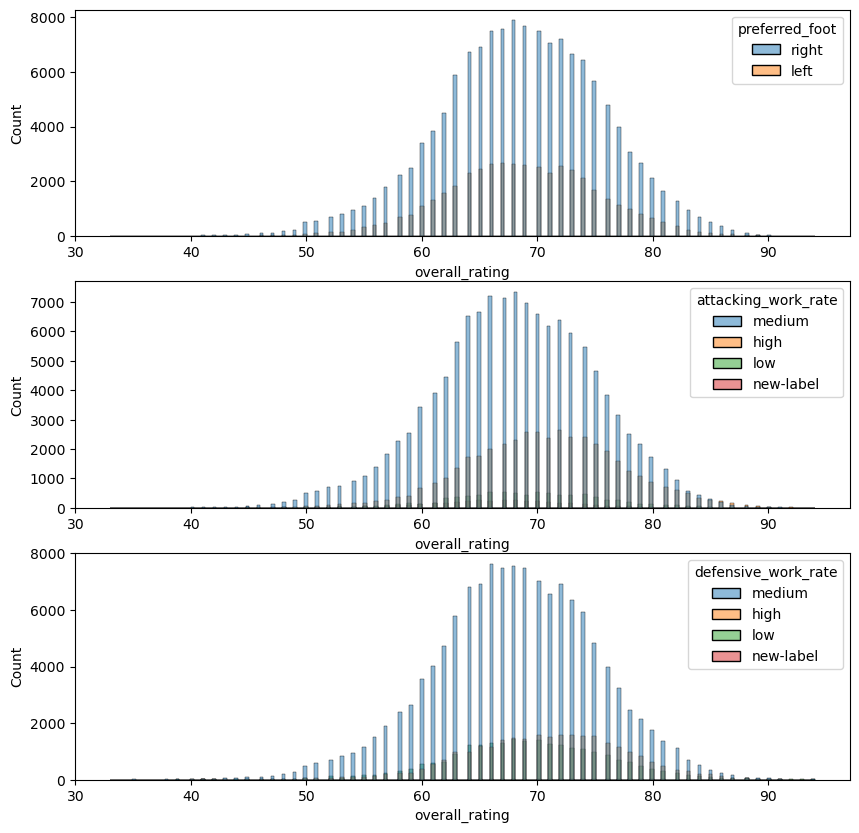

In [358]:
plt.figure(figsize=(10,10))

for i,val in enumerate(object_col):
    plt.subplot(3,1,i+1)
    sns.histplot(data, hue=val, x='overall_rating');

### Unique Values in Numerical Variables

In [359]:
print('\nUnique values in numerical variables:\n')

for val in numeric_col:
    print(f' <{val}> : {len(data[val].unique())}')


Unique values in numerical variables:

 <id> : 183978
 <player_fifa_api_id> : 11062
 <player_api_id> : 11060
 <overall_rating> : 62
 <potential> : 57
 <crossing> : 96
 <finishing> : 98
 <heading_accuracy> : 97
 <short_passing> : 96
 <volleys> : 94
 <dribbling> : 98
 <curve> : 93
 <free_kick_accuracy> : 98
 <long_passing> : 96
 <ball_control> : 94
 <acceleration> : 87
 <sprint_speed> : 86
 <agility> : 82
 <reactions> : 79
 <balance> : 82
 <shot_power> : 97
 <jumping> : 80
 <stamina> : 85
 <strength> : 83
 <long_shots> : 97
 <aggression> : 92
 <interceptions> : 97
 <positioning> : 96
 <vision> : 98
 <penalties> : 95
 <marking> : 96
 <standing_tackle> : 96
 <sliding_tackle> : 95
 <gk_diving> : 94
 <gk_handling> : 91
 <gk_kicking> : 98
 <gk_positioning> : 95
 <gk_reflexes> : 93


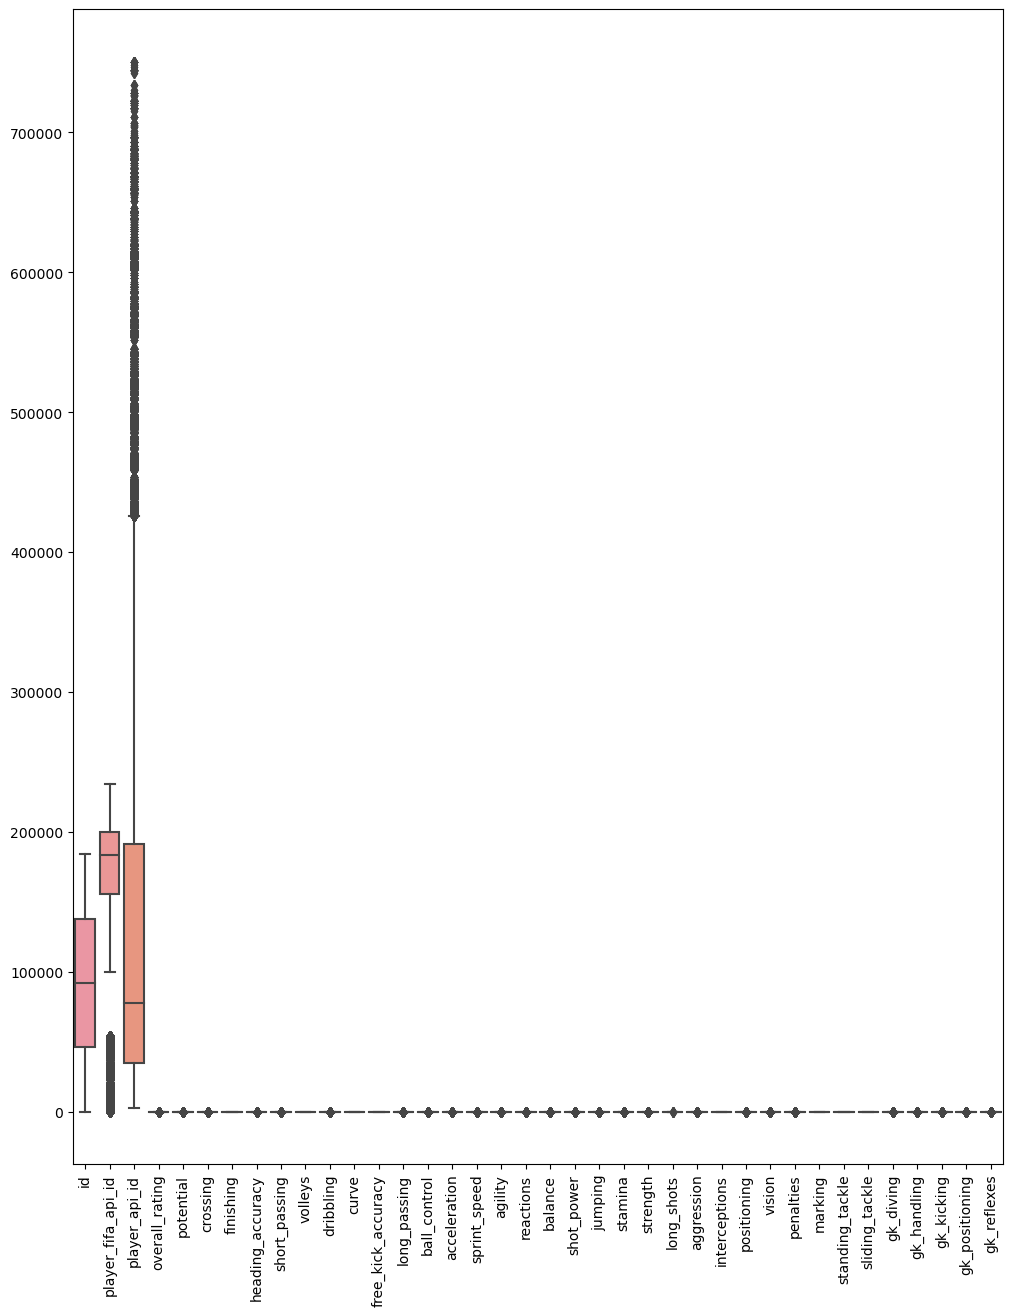

In [360]:
plt.figure(figsize = (12,15))
sns.boxplot(data[numeric_col]); # boxplot

ax = plt.gca() # get current axes
ax.tick_params(axis='x', rotation=90) # Rotate the x-axis labels

* There seem to be outliers in **player_fifa_api_id** and **player_api_id** variables
* Also, the scale of the frist three variables is very different from the rest of the numerical variables. 

Let us see the boxplot without these variables:

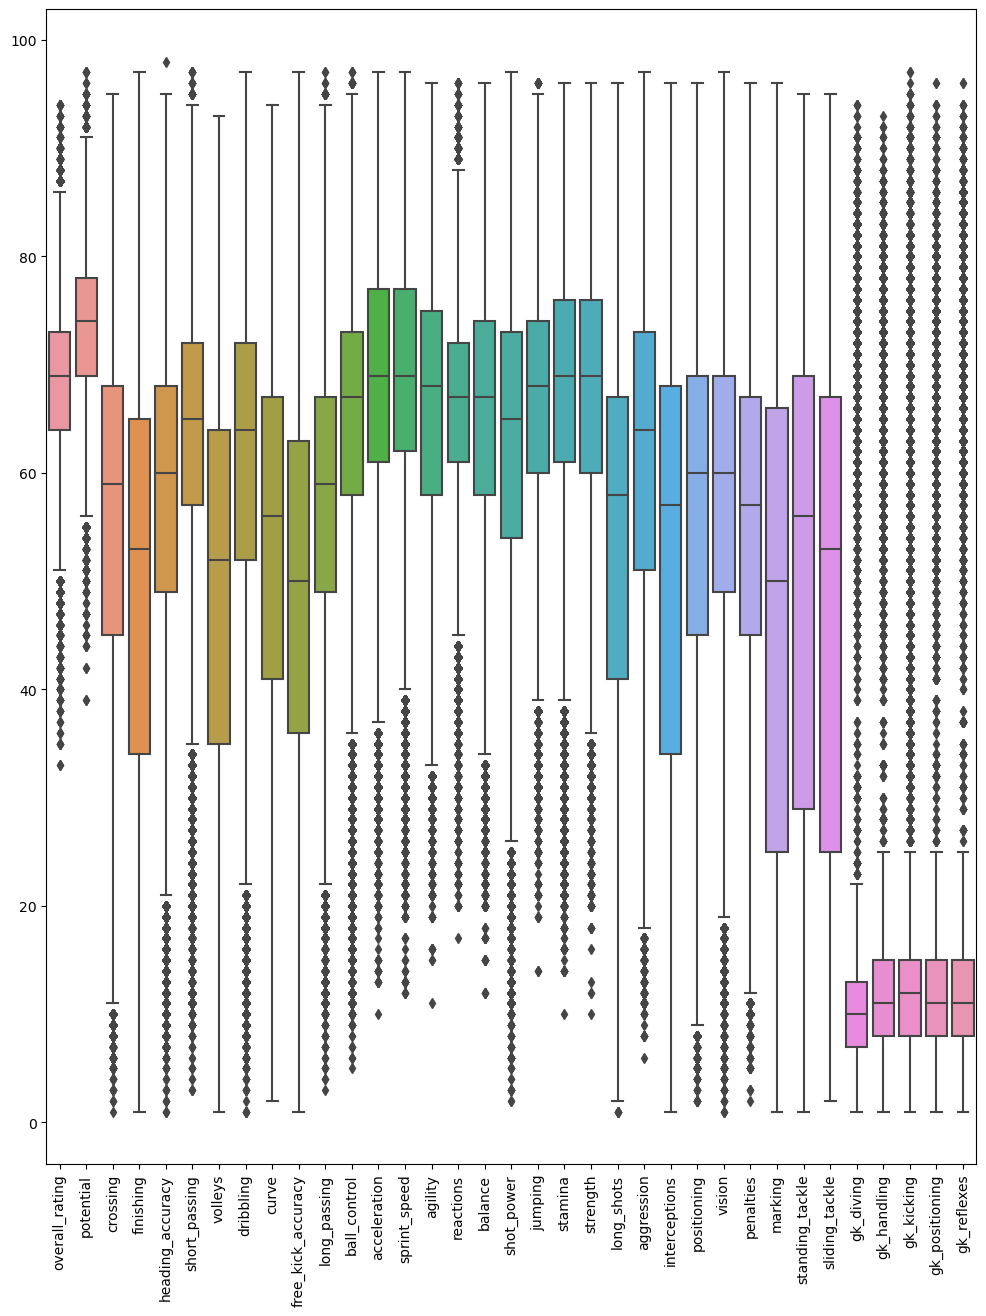

In [361]:
plt.figure(figsize = (12,15))
sns.boxplot(data[numeric_col].drop(columns=['id','player_fifa_api_id','player_api_id'], axis = 1)); # boxplot

ax = plt.gca() # get current axes
ax.tick_params(axis='x', rotation=90) # Rotate the x-axis labels

There are many outliers in the numerical columns that needs treatment.

### Missing Value Treatment

In [362]:
data[numeric_col].isnull().sum().sum()

42399

In [363]:
data[object_col].isnull().sum().sum()

4902

In [364]:
data[numeric_col] = data[numeric_col].apply(lambda x:x.fillna(x.median()))
data[object_col] = data[object_col].apply(lambda x:x.fillna('NaN'))

In [365]:
print(f'There are {data[numeric_col].isnull().sum().sum()} missing values in numeric variables and {data[object_col].isnull().sum().sum()} missing values in object variables')

There are 0 missing values in numeric variables and 0 missing values in object variables


### Outlier Treatment

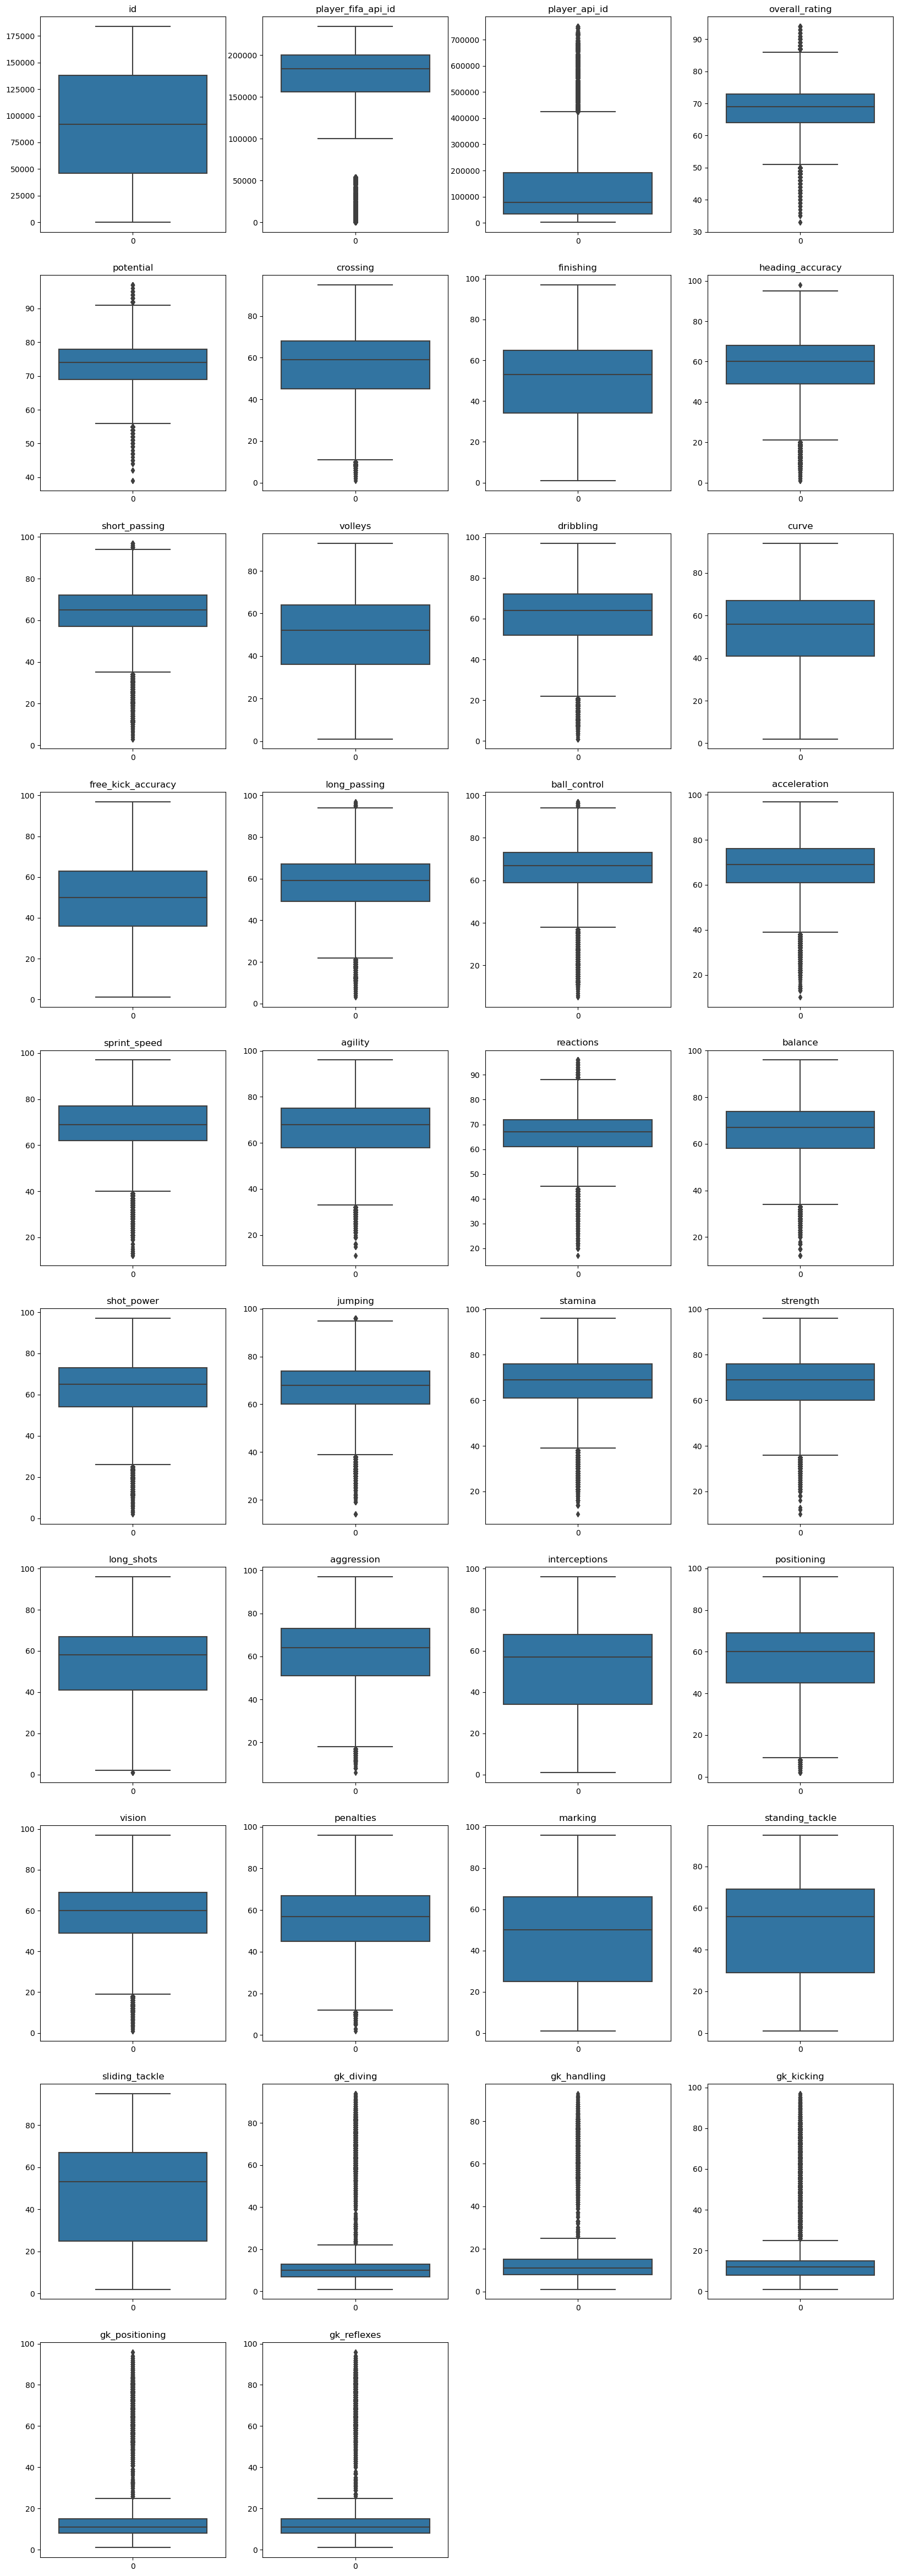

In [366]:
plt.figure(figsize = (20, 60))

for i,val in enumerate(numeric_col):
    plt.subplot(10,4,i+1)
    sns.boxplot(data[val]);
    plt.title(val)

We do not treat the outlier in these columns since they show players ID's.

In [367]:
columns=['id','player_fifa_api_id','player_api_id']

numeric_col = list(set(numeric_col)-set(columns))

In [368]:
def IQR_Outlier_Treatment(x):
    """
    This function uses IQR and clipping method
    to treat outliers in numeric variables
    """
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_whis = Q1 - 1.5 * IQR
    upper_whis = Q3 + 1.5 * IQR
    
    return np.clip(x,lower_whis,upper_whis)

In [369]:
data[numeric_col] = data[numeric_col].apply(IQR_Outlier_Treatment)

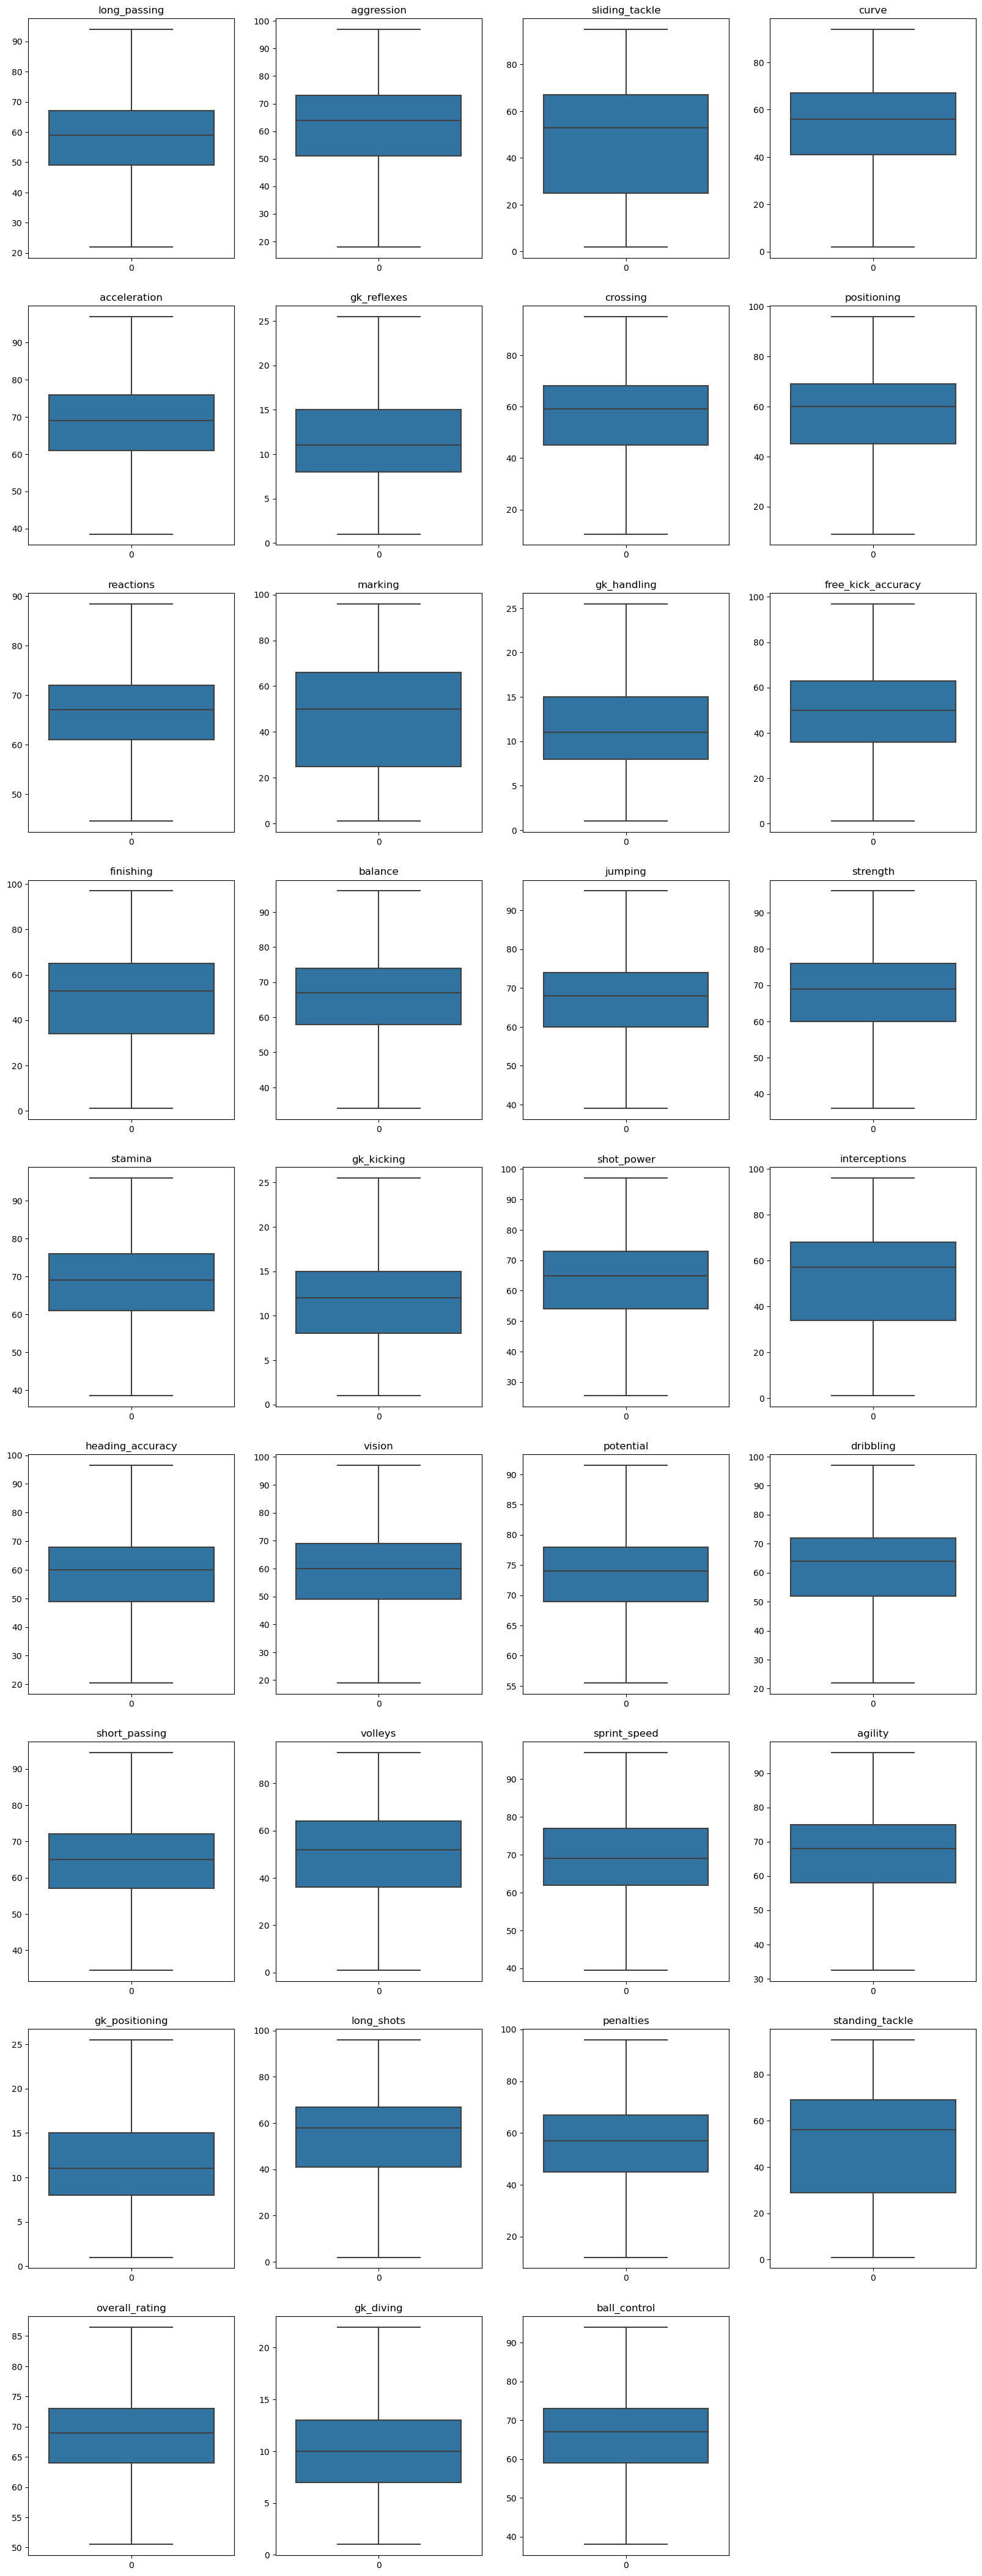

In [370]:
plt.figure(figsize = (20, 60))

for i,val in enumerate(numeric_col):
    plt.subplot(10,4,i+1)
    sns.boxplot(data[val]);
    plt.title(val)

### Creating New Features

In [371]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data = data.drop(columns = ['date'], axis = 1)

In [372]:
data.head(3)

,id,player_fifa_api_id,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day
0,1,218353,505942,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016,2,18
1,2,218353,505942,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,11,19
2,3,218353,505942,62.0,66.0,right,medium,medium,49.0,44.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,9,21


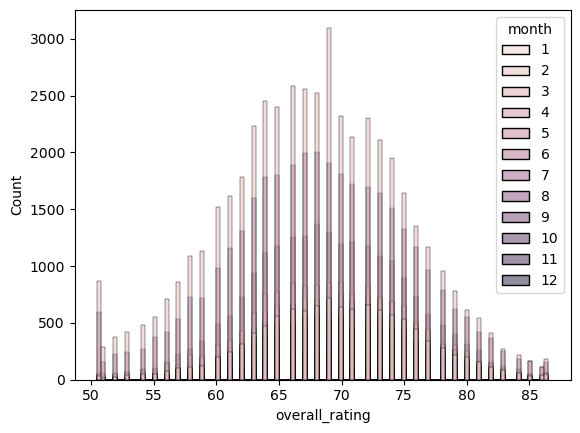

In [373]:
sns.histplot(data, hue='month', x = 'overall_rating');

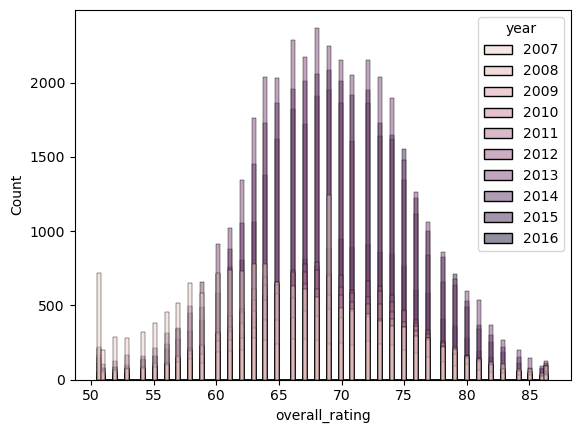

In [374]:
sns.histplot(data, hue='year', x = 'overall_rating');

### One-hot Encoding

In [375]:
object_col = data.loc[:, data.dtypes=='object'].columns

data = pd.get_dummies(data, columns=object_col, drop_first=True)

In [376]:
data.head(3)

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,preferred_foot_left,preferred_foot_right,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_new-label,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_new-label
0,1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,0,1,0,0,1,0,0,0,1,0
1,2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,0,1,0,0,1,0,0,0,1,0
2,3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,...,0,1,0,0,1,0,0,0,1,0


##### Defining X and y:

In [377]:
y = data[['overall_rating']]
X = data.drop(columns = ['overall_rating'], axis = 1)

In [378]:
X.shape

(183978, 50)

In [379]:
X.head()

,id,player_fifa_api_id,player_api_id,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,preferred_foot_left,preferred_foot_right,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_new-label,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_new-label
0,1,218353,505942,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,0,1,0,0,1,0,0,0,1,0
1,2,218353,505942,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,0,1,0,0,1,0,0,0,1,0
2,3,218353,505942,66.0,49.0,44.0,71.0,61.0,44.0,51.0,...,0,1,0,0,1,0,0,0,1,0
3,4,218353,505942,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,0,1,0,0,1,0,0,0,1,0
4,5,218353,505942,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,0,1,0,0,1,0,0,0,1,0


### Train_test Splitting

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [381]:
X_train.shape

(128784, 50)

In [382]:
X_test.shape

(55194, 50)

### Feature Selection

In [383]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression  

* For regression purposees (continues y variable) we use **`f_regression`**
* For regression purposees (continues y variable) we use **`chi2`**

In [384]:
# We select the k = 10 best features
Selector = SelectKBest(score_func = f_regression, k=20)

X_selected = Selector.fit_transform(X_train, y_train['overall_rating'])

cols_idxs = Selector.get_support(indices=True)

In [385]:
# Choosing the selected features
X_train_selected = X_train.iloc[:,cols_idxs]
X_test_selected = X_test.iloc[:,cols_idxs]

In [386]:
X_train_selected.head()

,player_api_id,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,reactions,shot_power,stamina,long_shots,aggression,positioning,vision,penalties
92111,420720,71.0,62.0,63.0,44.0,61.0,55.0,66.0,54.0,50.0,52.0,68.0,54.0,63.0,52.0,53.0,34.0,60.0,61.0,62.0
169952,304022,80.0,34.0,70.0,71.0,57.0,45.0,52.0,48.0,41.0,41.0,60.0,56.0,70.0,52.0,61.0,49.0,66.0,52.0,72.0
173147,24656,85.0,70.0,56.0,70.0,84.0,78.0,64.0,63.0,72.0,88.0,77.0,64.0,83.0,70.0,82.0,73.0,71.0,83.0,64.0
173230,22994,68.0,61.0,60.0,61.0,66.0,51.0,62.0,61.0,60.0,62.0,63.0,61.0,65.0,65.0,57.0,62.0,57.0,65.0,51.0
76528,24003,80.0,65.0,75.0,76.0,65.0,72.0,70.0,54.0,43.0,43.0,71.0,74.0,77.0,72.0,67.0,83.0,74.0,67.0,64.0


In [387]:
X_train_selected.shape

(128784, 20)

### Decision Tree Regressor (all features)

In [388]:
dtr_all = DecisionTreeRegressor(ccp_alpha=0.00001, random_state=1)
dtr_all.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=1e-05, random_state=1)

In [389]:
y_pred_train = dtr_all.predict(X_train)
y_pred_test = dtr_all.predict(X_test)

In [390]:
print('Performance on the training set')

pd.DataFrame({'MSE': mean_squared_error(y_train, y_pred_train),
               'MAE': mean_absolute_error(y_train, y_pred_train),
             },
            index =['dtr_all'])

Performance on the training set


,MSE,MAE
dtr_all,0.082255,0.150773


In [391]:
print('Performance on the test set')

pd.DataFrame({'MSE': mean_squared_error(y_test, y_pred_test),
               'MAE': mean_absolute_error(y_test, y_pred_test),
             },
            index =['dtr_all'])

Performance on the test set


,MSE,MAE
dtr_all,2.578523,0.813752


### Decision Tree Regressor (selected features)

In [392]:
dtr_selected = DecisionTreeRegressor(random_state=1)
dtr_selected.fit(X_train_selected, y_train)

DecisionTreeRegressor(random_state=1)

In [393]:
y_pred_train = dtr_selected.predict(X_train_selected)
y_pred_test = dtr_selected.predict(X_test_selected)

In [394]:
print('Performance on the training set')

pd.DataFrame({'MSE': mean_squared_error(y_train, y_pred_train),
               'MAE': mean_absolute_error(y_train, y_pred_train),
             },
            index =['dtr_all'])

Performance on the training set


,MSE,MAE
dtr_all,0.049823,0.032338


In [395]:
print('Performance on the test set')

pd.DataFrame({'MSE': mean_squared_error(y_test, y_pred_test),
               'MAE': mean_absolute_error(y_test, y_pred_test),
             },
            index =['dtr_all'])

Performance on the test set


,MSE,MAE
dtr_all,2.860132,0.762623


## 3- Hyperparameter Tuning of DT

In [396]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [397]:
dtr = DecisionTreeRegressor(random_state=1)

grid_parameter = {
    'max_depth': [29, 25, 30, 40],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],
    'min_impurity_decrease': [0.0001, 0.00001, 0.000001],
    'ccp_alpha': [0.00001, 0.000001]
}

grid_search = GridSearchCV(dtr, grid_parameter, cv=5, scoring= make_scorer(mean_absolute_error))

In [330]:
grid_search.fit(X_train_selected, y_train)
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best CV Score: ", grid_search.best_score_)

Best Hyperparameters:  {'ccp_alpha': 1e-05, 'max_depth': 25, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV Score:  1.2317278067075326


##### Performance on test set

In [398]:
dtr_tuned = DecisionTreeRegressor(ccp_alpha=0.1e-05, max_depth=25, 
                                  min_impurity_decrease=0.0001, min_samples_leaf=4, min_samples_split=2, random_state=1)

dtr_tuned.fit(X_train, y_train)
y_pred_test = dtr_tuned.predict(X_test)

pd.DataFrame({'MSE': mean_squared_error(y_test, y_pred_test),
               'MAE': mean_absolute_error(y_test, y_pred_test),
             },
            index =['dtr_tuned'])

,MSE,MAE
dtr_tuned,2.744994,1.051462


##### Predictions vs Actual Values - Test Set

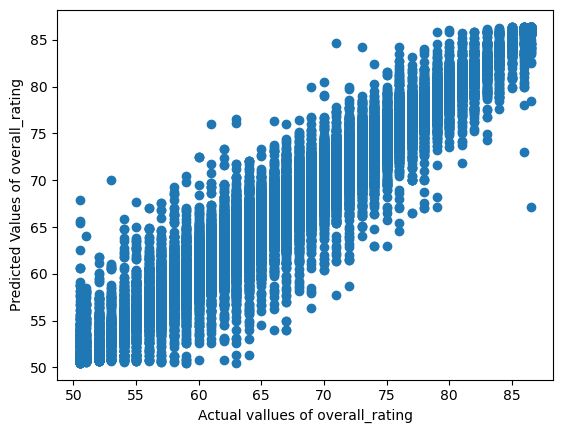

In [399]:
plt.scatter(y_test, y_pred_test);
plt.xlabel('Actual vallues of overall_rating');
plt.ylabel('Predicted Values of overall_rating');

# 4- Linear Regression

In [403]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)

pd.DataFrame({'MSE': mean_squared_error(y_test, y_pred_test),
               'MAE': mean_absolute_error(y_test, y_pred_test),
             },
            index =['dtr_tuned'])

,MSE,MAE
dtr_tuned,6.752535,1.944083
